In [43]:
__depends__ = ["../outputs/eta_anomaly_var_wavenumber_freq_october.npz",
               "../outputs/eta_anomaly_var_wavenumber_freq_april.npz",
               "../outputs/eta_anomaly_var_wavenumber_freq_all.npz",
               "../outputs/eta_anomaly_var_wavenumber_freq_4320_october.npz",
               "../outputs/eta_anomaly_var_wavenumber_freq_4320_april.npz",
               "../outputs/ke__wavenumber_freq_4320_october.npz",
               "../outputs/ke__wavenumber_freq_4320_april.npz",
               "../outputs/ke__wavenumber_freq_4320_all.npz",
               "../WOA/radii_min.npz",
                "../WOA/radii_max.npz",
               "../WOA/radii.npz",
              '../outputs/llc_kuroshio_spectra.nc']
__dest__ = []

In [44]:
__figpath__ = 'figs/'

# Plots wavenumber-frequency KE and SSH variance spectra

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.mlab import bivariate_normal

from netCDF4 import Dataset

import cmocean
import seawater as sw

from pyspec import spectrum

%matplotlib inline

In [46]:
speco = np.load(__depends__[0])
speca = np.load(__depends__[1])
spec = np.load(__depends__[2])
speco4320 = np.load(__depends__[3])
speca4320 = np.load(__depends__[4])
kespeco4320 = np.load(__depends__[5])
kespeca4320 = np.load(__depends__[6])
kespec4320 = np.load(__depends__[7])
radii = np.load(__depends__[-2])['radii']
radii_min = np.load(__depends__[-4])['radii']
radii_max = np.load(__depends__[-3])['radii']
llc = Dataset(__depends__[-1])

In [47]:
c1 = 'slateblue'
c2 = 'tomato'
c3 = 'k'
c4 = 'indigo'
plt.rcParams['lines.linewidth'] = 2.5

def leg_width(lg,fs):
    """"  Sets the linewidth of each legend object """
    for legobj in lg.legendHandles:
        legobj.set_linewidth(fs)
        
def add_second_axis(ax1):
    """ Add a x-axis at the top of the spectra figures """
    ax2 = ax1.twiny() 
    ax2.set_xscale('log')
    ax2.set_xlim(ax1.axis()[0], ax1.axis()[1])
    kp = 1./np.array([500.,250.,100.,50.,25.,10.])
    lp=np.array([500,250,100,50,25,10])
    ax2.set_xticks(kp)
    ax2.set_xticklabels(lp)
    plt.xlabel('Wavelength [km]')
    
def set_axes(type='ke'):
    if type=='ke':
        plt.loglog(kr,12.*e2,'.5',linewidth=2)
        plt.loglog(kr,35*e3,'.5',linewidth=2)
        plt.xlim(.75e-3,1/3.)
        plt.ylim(1.e-3,1.e2)
        plt.ylabel(r'KE density [m$^2$ s$^{-2}$/cpkm]')

    elif type=='ssha':
        plt.loglog(kr,e2/.5e1,'.5',linewidth=2)
        plt.loglog(kr,3*e5/1.5e2,'.5',linewidth=2)
        plt.xlim(.75e-3,1/3.)
        plt.ylim(1.e-6,1.e2)
        plt.ylabel(r'SSH variance density [m$^2$/cpkm]')   
    
    plt.xlabel(r'Wavenumber [cpkm]')


In [48]:
f,ki = speco['f'],spec['ki']
Eetao = speco['iEeta']
Eetaa = speca['iEeta']
Eeta = spec['iEeta']

In [49]:
f, Eetao, Eetaa, Eeta = f[1:f.size/2], Eetao[:,1:f.size/2],Eetaa[:,1:f.size/2], Eeta[:,1:f.size/2]

/Users/crocha/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


In [50]:
f0 = sw.f(32.5)
fmin, fmax = sw.f(25), sw.f(40.)


#f0 = sw.f(32.69)
N2 = (276.32*f0)**2

m = (1./150)
m2 = (1./500)
m3 = (1./550)
m4 = (1./1500)

k = np.logspace(-3,-1,100)

omg = np.sqrt(f0**2 + N2*((k/m)**2))*3600/2/np.pi
omg2 = np.sqrt(f0**2 + N2*((k/m2)**2))*3600/2/np.pi
omg3 = np.sqrt(f0**2 + N2*((k/m3)**2))*3600/2/np.pi
omg4 = np.sqrt(f0**2 + N2*((k/m4)**2))*3600/2/np.pi

rd1 = 2*np.pi*radii[0]
rd2 = 2*np.pi*radii[1]
rd3 = 2*np.pi*radii[2]
rd4 = 2*np.pi*radii[3]
rd5 = 2*np.pi*radii[4]

rd1_min = 2*np.pi*radii_min[0]
rd4_min = 2*np.pi*radii_min[3]
rd1_max = 2*np.pi*radii_max[0]
rd4_max = 2*np.pi*radii_max[3]

rd0 = 2000  #  external deformation radius (km)
omg_0 = f0*np.sqrt(1 + (k*rd0)**2)*3600/2/np.pi

omg_1 = f0*np.sqrt(1 + (k*rd1)**2)*3600/2/np.pi
omg_2 = f0*np.sqrt(1 + (k*rd2)**2)*3600/2/np.pi
omg_3 = f0*np.sqrt(1 + (k*rd3)**2)*3600/2/np.pi
omg_4 = f0*np.sqrt(1 + (k*rd4)**2)*3600/2/np.pi
omg_5 = f0*np.sqrt(1 + (k*rd5)**2)*3600/2/np.pi

omg_1_min = fmin*np.sqrt(1 + (k*rd1_min)**2)*3600/2/np.pi
omg_4_min = fmin*np.sqrt(1 + (k*rd4_min)**2)*3600/2/np.pi

omg_1_max = fmax*np.sqrt(1 + (k*rd1_max)**2)*3600/2/np.pi
omg_4_max = fmax*np.sqrt(1 + (k*rd4_max)**2)*3600/2/np.pi

m2 = 1./12.4
f0 = f0*3600/(2*np.pi)
fmin = fmax*3600/(2*np.pi)
fmax = fmin*3600/(2*np.pi)

In [51]:
RatioEeta = Eetao.T/Eetaa.T
RatioEeta = np.ma.masked_array(RatioEeta,Eetao.T<1.e-2)

In [52]:
def plt_freqs():
    plt.fill_between(k, omg_4_min, omg_1_max, facecolor='.5',alpha=.35)
    plt.text(1./150,.425,r'mode 1, 40$^\circ$N',fontsize=11,rotation=34.5)
    plt.text(1./37.5,.28,r'mode 4, 25$^\circ$N',fontsize=11,rotation=36)
    plt.plot([1.e-3,1.e-1],[f0,f0],'k--',linewidth=1)
    plt.plot([1.e-3,1.e-1],[m2,m2],'k--',linewidth=1)
    #plt.plot([1.e-3,1.e-1],[2*f0,2*f0],'k--',linewidth=1)
    plt.text(1/15.,.75*m2,'$M_2$',fontsize=14)
    plt.text(1/16.5,.75*f0,'$f_{32.5}$',fontsize=14)
    #plt.text(1./550,2.1*f0,'2$f_{32.5}$',fontsize=14)

# SSH variance

In [53]:
L, T = 1./ki, 1./f

fLsub = L < 100
fTsub = T < 1./f0


SSHvaro = Eetao[fLsub][...,fTsub].sum()
SSHvara = Eetaa[fLsub][...,fTsub].sum()

(SSHvaro-SSHvara)/SSHvaro

0.66610942100452908

## LLC4320, 1/48$^\circ$

In [54]:
f4320,ki4320 = speco4320['f'],speco4320['ki']
Eetao4320 = speco4320['iEeta']
Eetaa4320 = speca4320['iEeta']

In [55]:
f4320, Eetao4320, Eetaa4320 = f4320[1:f4320.size/2], Eetao4320[:,1:f4320.size/2],Eetaa4320[:,1:f4320.size/2]

/Users/crocha/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


In [56]:
RatioEeta4320 = Eetao4320.T/Eetaa4320.T
RatioEeta4320 = np.ma.masked_array(RatioEeta4320,Eetao4320.T<1.e-2)

In [57]:
L, T = 1./ki4320, 1./f4320

fLsub = L < 100
fTsub = T < 1.2/f0
fTnsub = T > 0.8/f0

Tm2 = 12.4
Tf = 1./f0

fTm2 = (T>.9*Tm2) & (T<1.1*Tm2) 
fTf = (T>.9*Tf) & (T<1.1*Tf) 

SSHvaro = Eetao4320[fLsub][...,fTsub].sum()
SSHvara = Eetaa4320[fLsub][...,fTsub].sum()
SSHvaro_si = Eetao4320[fLsub][...,fTnsub].sum()
SSHvara_si = Eetaa4320[fLsub][...,fTnsub].sum()

SSHvaro_m2 = Eetao4320[fLsub][...,fTm2].sum()
SSHvara_m2 = Eetaa4320[fLsub][...,fTm2].sum()

SSHvaro_f = Eetao4320[fLsub][...,fTf].sum()
SSHvara_f = Eetaa4320[fLsub][...,fTf].sum()

(SSHvaro-SSHvara)/SSHvaro

0.65027354684741756

In [58]:
dk, df = ki4320[1],f4320[1]
np.sqrt(SSHvaro*dk*df), np.sqrt(SSHvara*dk*df), np.sqrt(SSHvaro_si*dk*df), np.sqrt(SSHvara_si*dk*df),np.sqrt(SSHvaro_m2*dk*df),np.sqrt(SSHvara_m2*dk*df), np.sqrt(SSHvaro_f*dk*df),np.sqrt(SSHvara_f*dk*df) 

(0.049271001056777453,
 0.029137724170601832,
 0.020402961157148479,
 0.051702318621115559,
 0.031153752883761997,
 0.014923084764656985,
 0.002484947799126629,
 0.003764396644105784)

In [59]:
N = 10 # there are about 15 independent realizations of the wavenumber-frequency
       # spectrum at the 2 x f --- less at low frequencies/low wavenumbers,
       # more at high frequencies/high wavenumbers

Ns = np.ones_like(ki4320)*N

ssh_k_s = np.ones_like(ki4320)*1.e-5
ke_k_s = np.ones_like(ki4320)*3.e-3

Ns[1./ki4320 > 200] = N/8
Ns[(1./ki4320 < 200) & (1./ki4320 > 100)] = N/4
Ns[(1./ki4320 < 100) & (1./ki4320 > 50)] = N/2
Ns[(1./ki4320 < 25)] = 2*N

ssh_k_l, ssh_k_u = spectrum.spec_error(ssh_k_s,sn=Ns)
ke_k_l, ke_k_u = spectrum.spec_error(ke_k_s,sn=Ns)

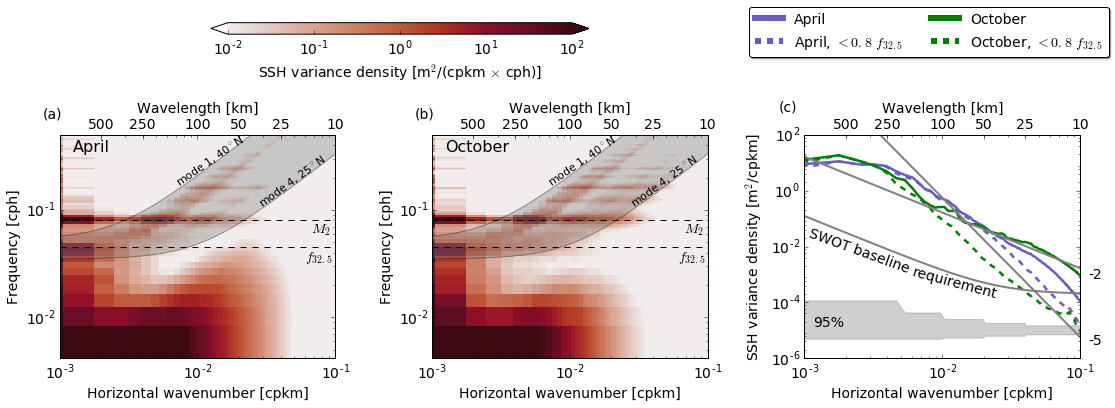

In [60]:
vmin, vmax = 1.e-2, 1.e2


# SWOT threeshold requirements
ESWOT = 2.e-4 + 1.25e-7*(ki4320**-2)


fig = plt.figure(figsize=(21,4.))

ax = plt.subplot(131)
plt.pcolormesh(ki4320,f4320,Eetaa4320.T,norm=LogNorm(vmin=vmin,vmax=vmax),cmap=cmocean.cm.amp) #cmocean.cm.ice_r)

ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposx='clip')
plt.xlabel("Horizontal wavenumber [cpkm]")
plt.ylabel("Frequency [cph]")
plt_freqs()
plt.xlim(1.e-3,1/5./2.)
plt.ylim(0,.5)
add_second_axis(ax)

plt.text(1/800,.35,'April',color='k',fontsize=16)
plt.text(.75e-3,1/1.4,'(a)',fontsize=14)

#add_second_axis(ax)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

ax = plt.subplot(132)
cdensity = plt.pcolormesh(ki4320,f4320,Eetao4320.T,norm=LogNorm(vmin=vmin,vmax=vmax),cmap=cmocean.cm.amp)#cmocean.cm.ice_r)

ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposx='clip')
plt.xlabel("Horizontal wavenumber [cpkm]")
plt_freqs()

plt.xlim(1.e-3,1/5./2)
#plt.xlim(1.e-3,1/3.)

plt.ylim(0,.5)
#plt.yticks([])
plt.ylabel("Frequency [cph]")

plt.text(1/800,.35,'October',color='k',fontsize=16)
add_second_axis(ax)
plt.text(.75e-3,1/1.4,'(b)',fontsize=14)


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.35, hspace=None)


ax = plt.subplot(133)

kr = np.array([1.e-4,1.])
e2 = kr**-2/1.e4
e3 = kr**-3/1.e7
e5 = kr**-5/1.e9
df = f[1]

plt.loglog(ki4320,Eetaa4320[:,:].sum(axis=1)*df,color=c1,label='April')
plt.loglog(ki4320,Eetaa4320[:,fTnsub].sum(axis=1)*df,'--',color=c1,label='April, $< 0.8$ $f_{32.5}$')
plt.loglog(ki4320,Eetao4320[:,:].sum(axis=1)*df,color='g',label='October')
plt.loglog(ki4320,Eetao4320[:,fTnsub].sum(axis=1)*df,'--',color='g',label='October, $< 0.8$ $f_{32.5}$')
plt.loglog(ki4320,ESWOT,'.5',linewidth=2)


plt.fill_between(ki4320,ssh_k_l, ssh_k_u, color='.25', alpha=0.25)
plt.text(1.15e-3,1.4e-5,'95%',fontsize=14)

plt.text(1.15e-1,7.e-4,'-2',fontsize=14)
plt.text(1.15e-1,.3e-5,'-5',fontsize=14)
plt.text(1./960,2.1e-2,'SWOT baseline',fontsize=14,rotation=-20)
plt.text(1./170,.9e-3,'requirement',fontsize=14,rotation=-15)

plt.loglog(kr,e2/.6e1,'.5',linewidth=2)
plt.loglog(kr,8.5*e5/1.5e2,'.5',linewidth=2)
plt.xlim(1.e-3,1e-1)
plt.ylim(1.e-5,1.e2)
plt.xlabel(r'Horizontal wavenumber [cpkm]')
plt.ylabel(r'SSH variance density [m$^2$/cpkm]')
#plt.text(3.e-2, 14, "SSH variance", size=16, rotation=0.,
#         ha="center", va="center",
#         bbox = dict(boxstyle="round",ec='k',fc='w'))
plt.ylim(1.e-6,1.e2)
plt.text(.65e-3,700.,'(c)',fontsize=14)
plt.yticks([1.e-6,1.e-4,1.e-2,1.e0,1e2])
add_second_axis(ax)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.225, 1.25, 0.25, 0.04])
fig.colorbar(cdensity, cax=cbar_ax,label=r'SSH variance density [m$^2$/(cpkm $\times$ cph)]'
             ,extend='both',orientation='horizontal')

lg = ax.legend(loc=(-0.2,1.35), ncol=2, fancybox=True,frameon=True, shadow=True)
leg_width(lg,fs=6)

#plt.savefig(__dest__[0],dpi=100,bbox_inches='tight')

# KE

## LLC4320, 1/48$^\circ$

In [61]:
f4320,ki4320 = kespeco4320['f'],kespeco4320['ki']
Eo4320 = kespeco4320['iE']
Ea4320 = kespeca4320['iE']
E4320 = kespec4320['iE']

In [62]:
f4320, Eo4320, Ea4320, E4320 = f4320[1:f4320.size/2], Eo4320[:,1:f4320.size/2],Ea4320[:,1:f4320.size/2], E4320[:,1:f4320.size/2]

/Users/crocha/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


In [63]:
vmin, vmax = 1e-1, 1.e4

In [64]:
label_KEspec = r'KE density [(m$^2$ s$^{-2}$)/(cpkm $\times$ cph)]'

In [65]:
L, T = 1./ki, 1./f

fLsub = L < 100
fTsub = T < 1./f0
fTnsub = T > 0.8/f0

KEo = Eo4320[fLsub][...,fTsub].sum()
KEa = Ea4320[fLsub][...,fTsub].sum()
KEo_si = Eo4320[fLsub][...,fTnsub].sum()
KEa_si = Ea4320[fLsub][...,fTnsub].sum()
Tm2 = 12.4

fTm2 = (T>.9*Tm2) & (T<1.1*Tm2) 
fTf = (T>.9*Tf) & (T<1.1*Tf) 

KEo_m2 = Eo4320[fLsub][...,fTm2].sum()
KEa_m2 = Ea4320[fLsub][...,fTm2].sum()

KEo_f = Eo4320[fLsub][...,fTf].sum()
KEa_f = Ea4320[fLsub][...,fTf].sum()


(KEo-KEa)/KEo

np.sqrt(KEo*dk*df), np.sqrt(KEa*dk*df), np.sqrt(KEo_si*dk*df), np.sqrt(KEa_si*dk*df),np.sqrt(KEo_m2*dk*df),np.sqrt(KEa_m2*dk*df), np.sqrt(KEo_f*dk*df),np.sqrt(KEa_f*dk*df) 

/Users/crocha/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 234 but corresponding boolean dimension is 117
/Users/crocha/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 234 but corresponding boolean dimension is 117
/Users/crocha/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 234 but corresponding boolean dimension is 117
/Users/crocha/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 234 but corresponding boolean dimension is 117
/Users/crocha/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:16: VisibleDeprecationWar

(0.32707724983024805,
 0.19892509394993646,
 0.1709941074117029,
 0.45712162237150744,
 0.25068416794364562,
 0.12138063568479114,
 0.037978114942184865,
 0.081813264451539219)

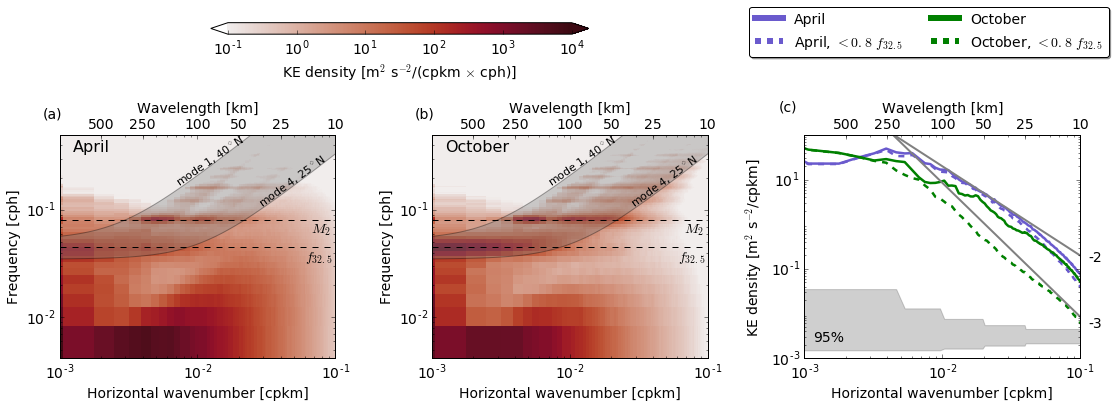

In [66]:
vmin, vmax = 1.e-1, 1.e4


fig = plt.figure(figsize=(21,4.))

ax = plt.subplot(131)
plt.pcolormesh(ki4320,f4320,Ea4320.T,norm=LogNorm(vmin=vmin,vmax=vmax),cmap=cmocean.cm.amp)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposx='clip')
plt.xlabel("Horizontal wavenumber [cpkm]")
plt.ylabel("Frequency [cph]")
plt_freqs()
plt.xlim(1.e-3,1/5./2.)
plt.ylim(0,.5)
add_second_axis(ax)

plt.text(1/800,.35,'April',color='k',fontsize=16)
plt.text(.75e-3,1/1.4,'(a)',fontsize=14)

#add_second_axis(ax)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

ax = plt.subplot(132)
cdensity = plt.pcolormesh(ki4320,f4320,Eo4320.T,norm=LogNorm(vmin=vmin,vmax=vmax),cmap=cmocean.cm.amp)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposx='clip')
plt.xlabel("Horizontal wavenumber [cpkm]")
plt_freqs()

plt.xlim(1.e-3,1/5./2)
#plt.xlim(1.e-3,1/3.)

plt.ylim(0,.5)
#plt.yticks([])
plt.ylabel("Frequency [cph]")

plt.text(1/800,.35,'October',color='k',fontsize=16)
add_second_axis(ax)
plt.text(.75e-3,1/1.4,'(b)',fontsize=14)


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.35, hspace=None)


ax = plt.subplot(133)

kr = np.array([1.e-4,1.])
e2 = kr**-2/1.e4
e3 = kr**-3/1.e7
e5 = kr**-5/1.e9
df = f[1]

plt.loglog(ki4320,Ea4320[:,:].sum(axis=1)*df,color=c1,label='April')
plt.loglog(ki4320,Ea4320[:,fTnsub].sum(axis=1)*df,'--',color=c1,label='April, $< 0.8$ $f_{32.5}$')
plt.loglog(ki4320,Eo4320[:,:].sum(axis=1)*df,color='g',label='October')
plt.loglog(ki4320,Eo4320[:,fTnsub].sum(axis=1)*df,'--',color='g',label='October, $< 0.8$ $f_{32.5}$')


plt.fill_between(ki4320,ke_k_l, ke_k_u, color='.25', alpha=0.25)
plt.text(1.15e-3,2.4e-3,'95%',fontsize=14)


plt.loglog(kr,20.*e2,'.5',linewidth=2)
plt.loglog(kr,85*e3,'.5',linewidth=2)


plt.text(1.15e-1,1.5e-1,'-2',fontsize=14)
plt.text(1.15e-1,.5e-2,'-3',fontsize=14)

plt.xlim(1.e-3,1e-1)
plt.ylim(1.e-5,1.e2)
plt.xlabel(r'Horizontal wavenumber [cpkm]')
plt.ylabel(r'KE density [m$^2$ s$^{-2}$/cpkm]')
#plt.text(3.e-2, 14, "SSH variance", size=16, rotation=0.,
#         ha="center", va="center",
#         bbox = dict(boxstyle="round",ec='k',fc='w'))
plt.ylim(1.e-3,1.e2)
plt.text(.65e-3,340.,'(c)',fontsize=14)
plt.yticks([1.e-3,1.e-1,1.e1])
add_second_axis(ax)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.225, 1.25, 0.25, 0.04])
fig.colorbar(cdensity, cax=cbar_ax,label=r'KE density [m$^2$ s$^{-2}$/(cpkm $\times$ cph)]'
             ,extend='both',orientation='horizontal')


lg = ax.legend(loc=(-0.2,1.35), ncol=2, fancybox=True,frameon=True, shadow=True)
leg_width(lg,fs=6)

#plt.savefig(__dest__[1],dpi=100,bbox_inches='tight')